In [1]:
import os
os.chdir('/Users/ashto/OneDrive/Desktop/capstone')

In [3]:
import pandas as pd
data = pd.read_csv('heart.csv')

In [5]:
# Check for null values
print(data.isnull().sum())

age                                    0
sex                                    0
chestPainType                          0
restingBP                              0
Cholesterol                            0
fastingBloodSugar                      0
restingElectrocardiographicResults     0
maxHeartRate                           0
exerciseInducedAngina                  0
stdEPRESSIONiNDUCEDbYeXERCISE          0
peakSlope                              0
numMajorVesselsColoredByFlouroscopy    0
thalassemia                            0
target                                 0
dtype: int64


In [7]:
# Quick look at the data
print(data.describe())

              age         sex  chestPainType   restingBP  Cholesterol  \
count  303.000000  303.000000     303.000000  303.000000   303.000000   
mean    54.366337    0.683168       0.966997  131.623762   246.264026   
std      9.082101    0.466011       1.032052   17.538143    51.830751   
min     29.000000    0.000000       0.000000   94.000000   126.000000   
25%     47.500000    0.000000       0.000000  120.000000   211.000000   
50%     55.000000    1.000000       1.000000  130.000000   240.000000   
75%     61.000000    1.000000       2.000000  140.000000   274.500000   
max     77.000000    1.000000       3.000000  200.000000   564.000000   

       fastingBloodSugar  restingElectrocardiographicResults  maxHeartRate  \
count         303.000000                          303.000000    303.000000   
mean            0.148515                            0.528053    149.646865   
std             0.356198                            0.525860     22.905161   
min             0.000000      

In [9]:
# Calculate correlation Matrix
correlation = data.corr()
# Correlate with 'target' col. (patient did or didn't have a heart attack)
heart_attack_corr = correlation['target'].sort_values(ascending=False)
print(heart_attack_corr)

target                                 1.000000
chestPainType                          0.433798
maxHeartRate                           0.421741
peakSlope                              0.345877
restingElectrocardiographicResults     0.137230
fastingBloodSugar                     -0.028046
Cholesterol                           -0.085239
restingBP                             -0.144931
age                                   -0.225439
sex                                   -0.280937
thalassemia                           -0.344029
numMajorVesselsColoredByFlouroscopy   -0.391724
stdEPRESSIONiNDUCEDbYeXERCISE         -0.430696
exerciseInducedAngina                 -0.436757
Name: target, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

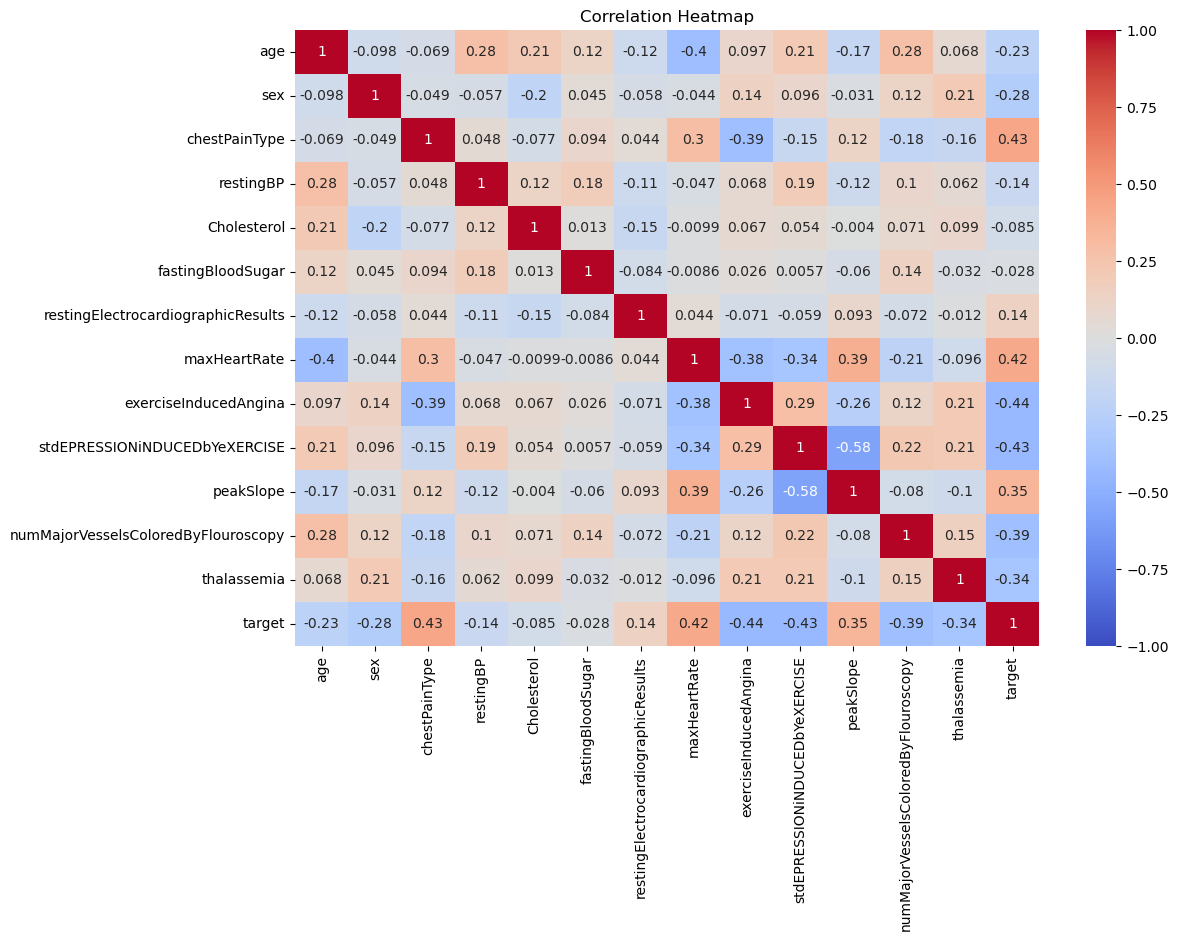

In [11]:
# Visualize corr with a heat map
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin = -1, vmax=1)
plt.title('Correlation Heatmap')
plt.show

In [12]:
#sepeate features and target
x = data.drop('target', axis=1)
y = data['target']
# standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=.2, random_state=42)

In [13]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train, y_train)

# Prediction and evaluation
from sklearn.metrics import accuracy_score, classification_report
y_knn_pred = knn_model.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, y_knn_pred))
print("KNN Classification Report:\n", classification_report(y_test, y_knn_pred))

KNN Accuracy: 0.9344262295081968
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



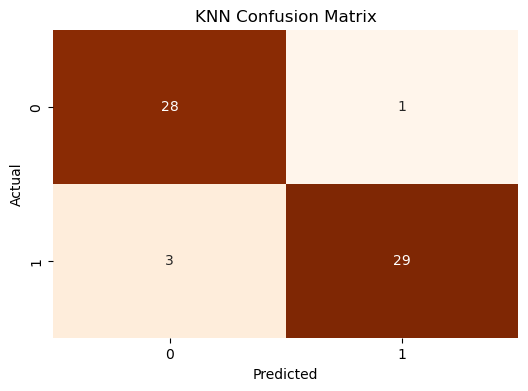

In [14]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, y_knn_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

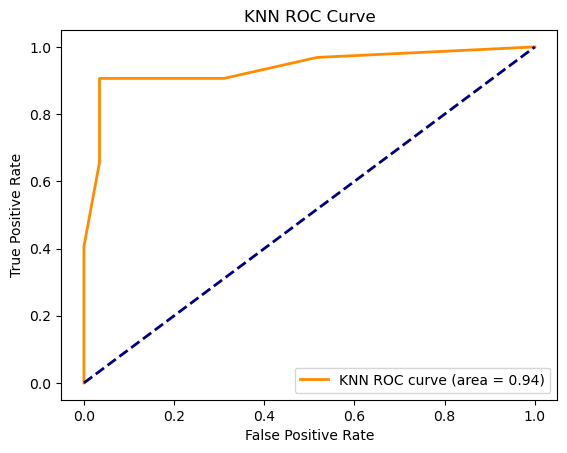

In [15]:
# ROC Curve
# Probablity of predictions for heart attack risk
y_knn_proba = knn_model.predict_proba(x_test)[:, 1]
# Make the curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_knn_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()